# HW1- Xi Lin

## 1. Get data in and set up X_train, X_test, y_train objects

In [12]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.

In [2]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)
X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

#### Explore bivariate results between GOP per capita and average happiness point. 

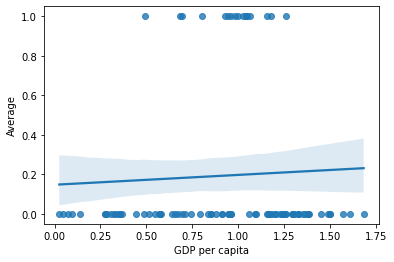

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between "Income" and "Happiness"
sns.regplot(x="GDP per capita", y=y_train['Average'], data=X_train,)
plt.show()

As clearly show in the graph, when the GDP per capita increase, the average will also increase at the same time. That means the GDP is a very important factor for people's happiness.  

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [5]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [6]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

##3. Fit model on preprocessed data and save preprocessor function and model 


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=3)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8522727272727273

#### Examine features that predict happiness categories using one or more models that allow for automatic feature selection

In [10]:
print(model.feature_importances_ )
col=X_train.columns 
col

[2.09923755e-01 1.45168876e-01 1.57943556e-01 9.64338865e-02
 6.54932407e-02 9.90098076e-02 6.34728306e-02 3.90695849e-02
 6.73560693e-03 9.75270183e-03 1.41469501e-02 1.56543205e-04
 1.68203824e-04 1.34444463e-03 1.59206341e-03 6.04291008e-03
 6.67802164e-03 5.52482277e-03 4.69471981e-04 6.94456233e-03
 2.70035680e-03 4.30671223e-03 6.75621247e-03 4.09078459e-02
 1.21025325e-03 8.04677990e-03]


Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks'],
      dtype='object')

As show in the result, the country or region is the most important feature that can affect the happiness; After the country or region, is the GDP per capita and social support which can also affect the happiness a lot. 

#### Save preprocessor function to local "preprocessor.zip" file

In [13]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [14]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. First Three Models Selection


In [24]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [25]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

#### First Model

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 

# Define the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'learning_rate': [0.5, 1, 1.5],
    'n_estimators': [10, 50, 100],
    'max_depth': [1, 3, 5],
    'random_state': [0,2,4]
}

# Use GridSearchCV to find the best hyperparameters using f1_score as the scoring metric
gridmodel_GBC = GridSearchCV(gb, param_grid=param_grid, cv=5,scoring='accuracy')

#use meta model methods to fit score and predict model:
gridmodel_GBC.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel_GBC.best_score_))
print("best parameters: {}".format(gridmodel_GBC.best_params_))

best mean cross-validation score: 0.669
best parameters: {'learning_rate': 1.5, 'max_depth': 5, 'n_estimators': 50, 'random_state': 4}


In [29]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel_GBC, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = gridmodel_GBC.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 567

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### Second Model

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Define the SVC
svc = SVC()

# Define the hyperparameters to be tuned
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 10],
    'degree': [0.001, 0.01, 1],
}
# Use GridSearchCV to find the best hyperparameters using f1_score as the scoring metric
gridmodel_svc = GridSearchCV(svc, param_grid=param_grid, cv=5,scoring='f1_weighted')

#use meta model methods to fit score and predict model:
gridmodel_svc.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel_svc.best_score_))
print("best parameters: {}".format(gridmodel_svc.best_params_))

best mean cross-validation score: 0.684
best parameters: {'C': 1, 'degree': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}


In [26]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel_svc, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = gridmodel_svc.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 705

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### Third Model

In [23]:
# Or you can experiment with deep learning models: 
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

Epoch 1/300
4/4 [==============================] - 3s 384ms/step - loss: 1.6195 - accuracy: 0.1515 - val_loss: 1.5908 - val_accuracy: 0.1364
Epoch 2/300
4/4 [==============================] - 0s 26ms/step - loss: 1.6076 - accuracy: 0.1364 - val_loss: 1.5863 - val_accuracy: 0.1364
Epoch 3/300
4/4 [==============================] - 0s 18ms/step - loss: 1.5965 - accuracy: 0.1818 - val_loss: 1.5819 - val_accuracy: 0.1364
Epoch 4/300
4/4 [==============================] - 0s 24ms/step - loss: 1.5870 - accuracy: 0.2879 - val_loss: 1.5764 - val_accuracy: 0.2273
Epoch 5/300
4/4 [==============================] - 0s 21ms/step - loss: 1.5755 - accuracy: 0.3030 - val_loss: 1.5714 - val_accuracy: 0.2727
Epoch 6/300
4/4 [==============================] - 0s 16ms/step - loss: 1.5640 - accuracy: 0.3030 - val_loss: 1.5677 - val_accuracy: 0.2727
Epoch 7/300
4/4 [==============================] - 0s 14ms/step - loss: 1.5563 - accuracy: 0.3485 - val_loss: 1.5643 - val_accuracy: 0.2727
Epoch 8/300
4/4 [==

In [24]:
# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [31]:

# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

3/3 [==============================] - 0s 5ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 569

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [27]:
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

# 5. Three More Model After Learning From Team

#### New Best Model 1 - Random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Example code to fit model:
model_1 = RandomForestClassifier(n_estimators=250, max_depth=10)
model_1.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model_1.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model_1.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 718

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### New Best Model 2 - GradientBoostingClassifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model_2 = GradientBoostingClassifier(learning_rate=1.3,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model_2.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model_2.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  


Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 734

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164



#### New Best Model 3 - SVC

In [43]:
from sklearn.svm import SVC

#Example code to fit model:
model_3 = SVC(C= 5, class_weight = 'balanced').fit(preprocessor(X_train), y_train_labels)# Fitting to the training set.
model_3.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model_3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model_3.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 738

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [44]:
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

#### Conclusion

In conclusion, three models were applied to the world happiness data and the results were evaluated using the f1 score metric. The models were a Random Forest Classifier with an f1 score of 0.487, a Gradient Boosting Classifier with an f1 score of 0.577, and a Support Vector Classifier with an f1 score of 0.56. Out of the three models, the Gradient Boosting Classifier had the highest f1 score, indicating that it performed the best in predicting the happiness scores of the data. However, further analysis and evaluation may be necessary to determine the optimal model for the specific problem and data set.